In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
'''
old
lab_ranges = {'ALBUMIN':[3.5, 5.5], 
              'BICARBONATE': [22,32],
              'BUN': [6,20],
              'CALCIUM': [8.4,10.3],
              'CHLORIDE': [96,108],
              'CREATININE': [0.4,1.1],
              'GLUCOSE':[70.0, 100.0],
              'HEMOGLOBIN': [11.2,15.7],
              'LACTATE': [0.5,2.0],
              'MAGNESIUM': [1.6,2.6],
              'PHOSPHATE': [2.7,4.5],
              'PLATELET': [150,400],
              'POTASSIUM': [3.3,5.1],
              'SODIUM': [133,145],
              'FREECALCIUM': [1.1, 1.35],
              'WBC': [3.5, 10.5]
             }
'''

lab_ranges = {'ALBUMIN':        [3.5, 5.5],                
              'BICARBONATE':    [21,29],                     
              'BUN':            [10,20],                                          
              'CALCIUM':        [8.5,10.5],                                       
              'FREECALCIUM':    [1.05,1.37],                  
              'CHLORIDE':       [98,106],                       
              'MAGNESIUM':      [1.8,3],                   
              'PHOSPHATE':      [3,4.5],                     
              'HEMOGLOBIN':     [12,18],                   
              'SODIUM':         [136,145],                
              'CREATININE':     [0.5,1.5],                   
              'PLATELET':       [150,400],                  
              'POTASSIUM':      [3.3,5.5],                 
              'LACTATE':        [0.5,2.0],                      
              'WBC':            [4.5,11],                     
              'GLUCOSE':        [75.0, 115.0]            
             } 

lab_unit = {  #'ALBUMIN':        'g/dL',          
              #'BICARBONATE':    'mEq/L',           
              #'BUN':            'mg/dL',                           
              #'CALCIUM':        'mg/dL',                                
              #'FREECALCIUM':    'mmol/L',        
              'CHLORIDE':       'mEq/L',             
              'MAGNESIUM':      'mg/dL',         
              'PHOSPHATE':      'mg/dL',           
              'HEMOGLOBIN':     'g/dL',          
              'SODIUM':         'mEq/L',        
              'CREATININE':     'mg/dL',           
              'PLATELET':       'K/uL',            
              'POTASSIUM':      'mEq/L',         
              'LACTATE':        'mmol/L',            
              'WBC':            'K/uL',            
              'GLUCOSE':        'mg/dL'         
             } 


data = pd.read_csv("S:/NUS/Year Two/UROPS/firstlab_xy.csv")

mort_data = data[data['mort_icu']==1]
surv_data = data[data['mort_icu']==0]


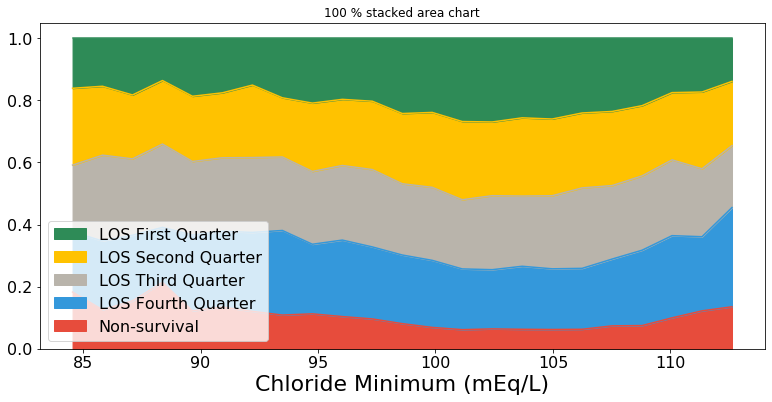

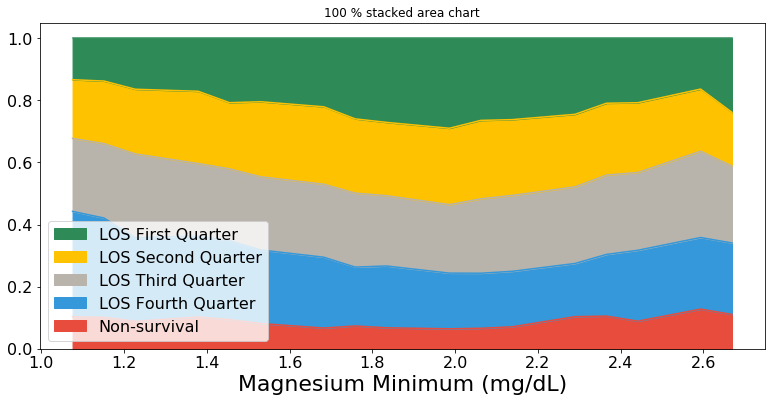

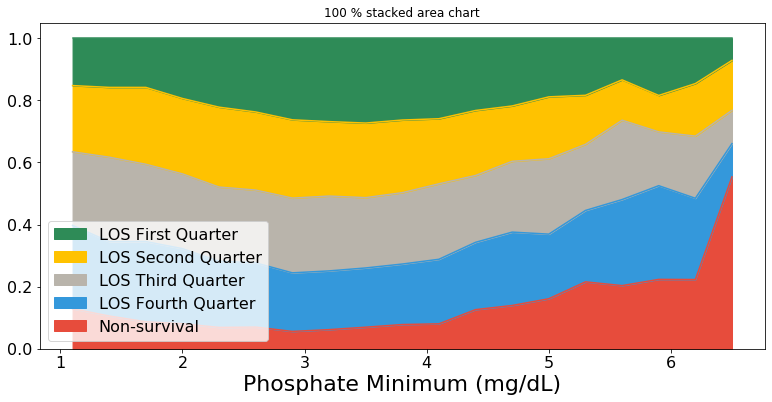

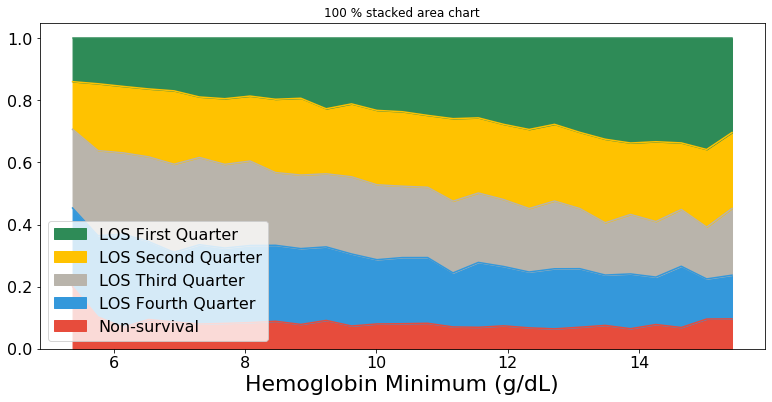

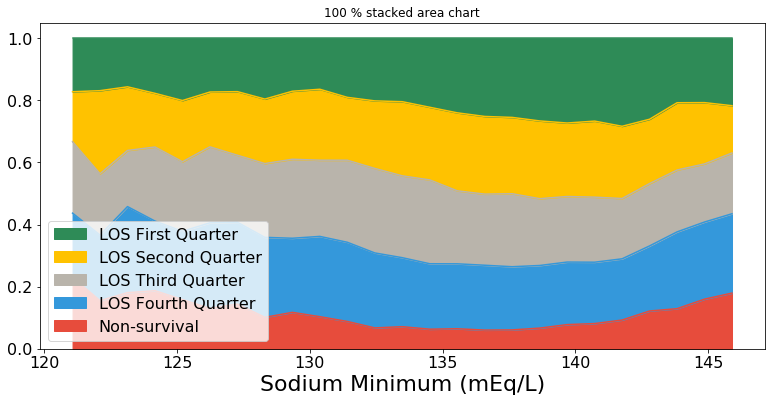

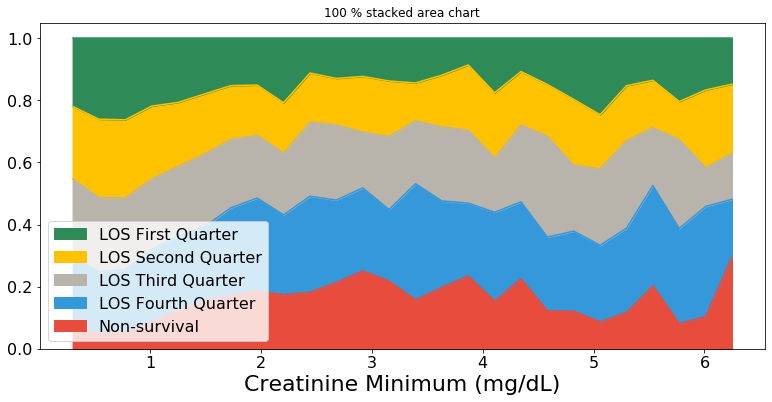

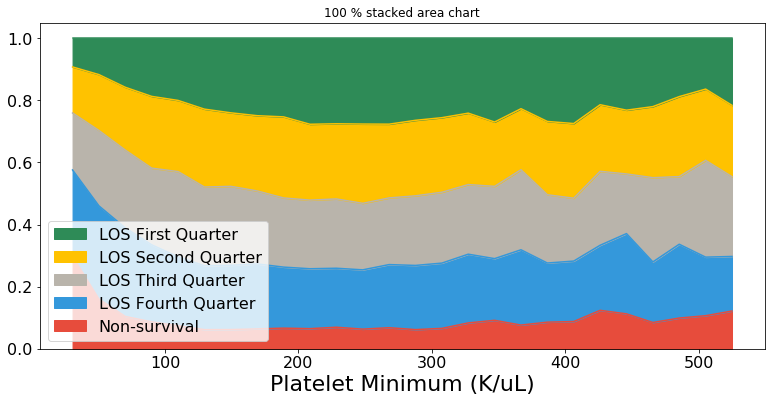

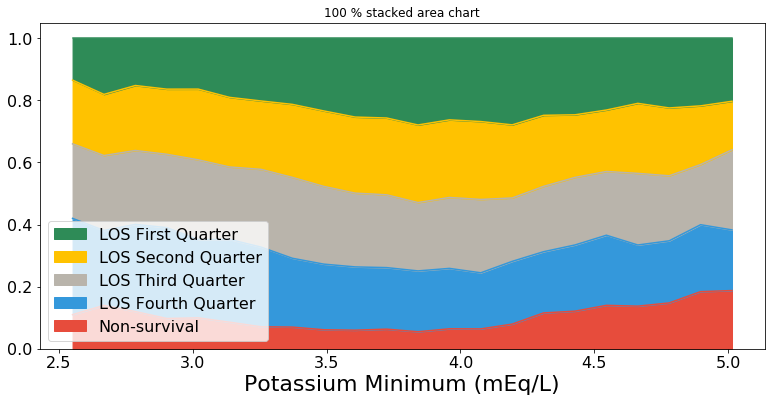

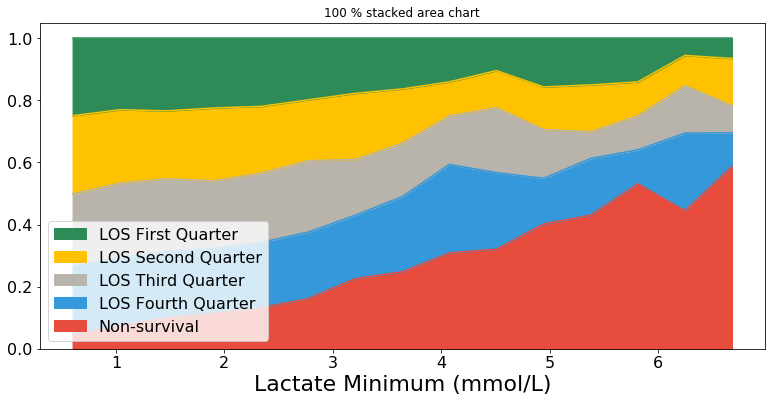

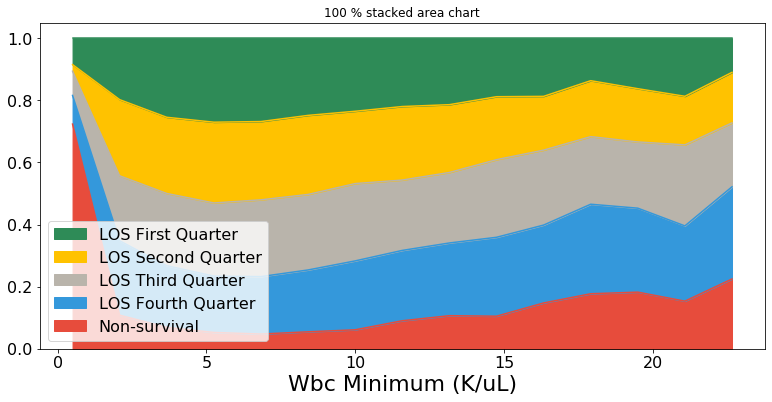

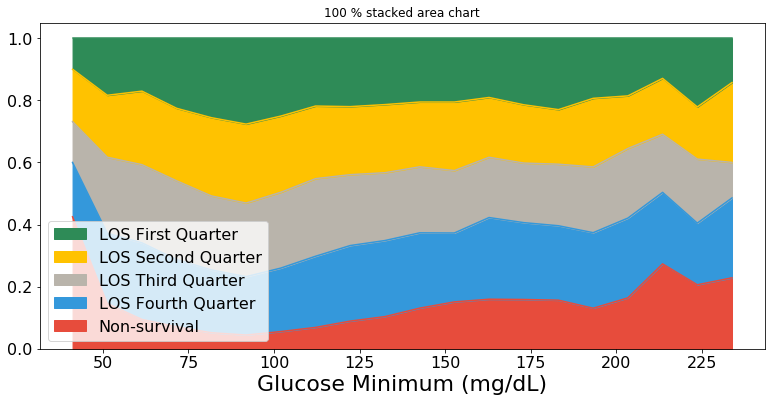

In [2]:
for i, u in iter(lab_unit.items()):

        # get x range for stacked plot 
        x_lower = data[i.lower()+'_min'].quantile(0.01).round(2)
        x_upper = data[i.lower()+'_min'].quantile(0.99).round(2)
        
        # get lab value of each quarter
        n_surv = surv_data[i.lower()+'_min'].dropna().count()
        quarter = n_surv//4

        non_surv_lower = mort_data[i.lower()+'_min'].quantile(0.01).round(2)
        non_surv_upper= mort_data[i.lower()+'_min'].quantile(0.99).round(2)

        #surv_lower = surv_data[i.lower()+'_min'].quantile(0.01).round(2)
        #surv_upper = surv_data[i.lower()+'_min'].quantile(0.99).round(2)

        surv_lower = data.sort_values(by=['los'])[i.lower()+'_min'][data.mort_icu==0].head(int(quarter)).quantile(0.01)
        surv_upper = data.sort_values(by=['los'])[i.lower()+'_min'][data.mort_icu==0].head(int(quarter)).quantile(0.99)

        '''
        non_survival = mort_data[i.lower()+'_min'][(data[i.lower()+'_min']>= x_lower) & (data[i.lower()+'_min']<= x_upper)].dropna()
        first_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][(data[i.lower()+'_min']>= x_lower) & (data[i.lower()+'_min']<= x_upper)].dropna().head(int(quarter))
        second_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][(data[i.lower()+'_min']>= x_lower) & (data[i.lower()+'_min']<= x_upper)].dropna()[int(quarter):int(quarter)*2]
        third_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][(data[i.lower()+'_min']>= x_lower) & (data[i.lower()+'_min']<= x_upper)].dropna()[int(quarter)*2:int(quarter)*3]
        fourth_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][(data[i.lower()+'_min']>= x_lower) & (data[i.lower()+'_min']<= x_upper)].dropna()[int(quarter)*3:]
        '''

        cond_surv = (data[i.lower()+'_min']>= surv_lower) & (data[i.lower()+'_min']<= surv_upper)

        non_survival = mort_data[i.lower()+'_min'][(data[i.lower()+'_min']>= non_surv_lower) & (data[i.lower()+'_min']<= non_surv_upper)].dropna()
        first_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][cond_surv].dropna().head(int(quarter))
        second_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][cond_surv].dropna()[int(quarter):int(quarter)*2]
        third_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][cond_surv].dropna()[int(quarter)*2:int(quarter)*3]
        fourth_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_min'][cond_surv].dropna()[int(quarter)*3:]

        
        non_survival = pd.Series(non_survival.values, name = 'Non-survival').sort_values().reset_index(drop=True)
        first_quarter = pd.Series(first_quarter.values, name='First Quarter').sort_values().reset_index(drop=True)
        second_quarter = pd.Series(second_quarter.values, name='Second Quarter').sort_values().reset_index(drop=True)
        third_quarter = pd.Series(third_quarter.values, name='Third Quarter').sort_values().reset_index(drop=True)
        fourth_quarter = pd.Series(fourth_quarter.values, name='Fourth Quarter').sort_values().reset_index(drop=True)
        
        all_groups = pd.DataFrame({'Non-survival':non_survival,
                         'First Quarter':first_quarter,
                         'Second Quarter':second_quarter,
                         'Third Quarter':third_quarter,
                         'Fourth Quarter':fourth_quarter
                         })


        range2 = max(all_groups['Non-survival'].max(), all_groups['First Quarter'].max(), all_groups['Second Quarter'].max(), all_groups['Third Quarter'].max(), all_groups['Fourth Quarter'].max())
        range1 = min(all_groups['Non-survival'].min(), all_groups['First Quarter'].min(), all_groups['Second Quarter'].min(), all_groups['Third Quarter'].min(), all_groups['Fourth Quarter'].dropna().min())

        #upper first or lower first? Does it matter?

        #x_range_min = np.linspace(x_lower, x_upper, num=30)
        x_range_min = np.linspace(range1, range2, num=30)




        df_min = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
        df_min['range'] = x_range_min


        for index, row in df_min.iterrows():
            c_non = 0
            c_1st = 0
            c_2nd = 0
            c_3rd = 0
            c_4th = 0
            if (row['range'] != x_range_min[-1]):
                for k in non_survival:
                    if k >= row['range'] and k < df_min.iloc[index+1]['range']:
                        c_non += 1 
            if (row['range'] != x_range_min[-1]):
                for k in first_quarter:
                    if k >= row['range'] and k < df_min.iloc[index+1]['range']:
                        c_1st += 1 
            if (row['range'] != x_range_min[-1]):
                for k in second_quarter:
                    if k >= row['range'] and k < df_min.iloc[index+1]['range']:
                        c_2nd += 1 
            if (row['range'] != x_range_min[-1]):
                for k in third_quarter:
                    if k >= row['range'] and k < df_min.iloc[index+1]['range']:
                        c_3rd += 1 
            if (row['range'] != x_range_min[-1]):
                for k in fourth_quarter:
                    if k >= row['range'] and k < df_min.iloc[index+1]['range']:
                        c_4th += 1 
        
            df_min.iat[index, 0] = c_non
            df_min.iat[index, 4] = c_1st
            df_min.iat[index, 3] = c_2nd
            df_min.iat[index, 2] = c_3rd
            df_min.iat[index, 1] = c_4th
        
        df_min_ = df_min.set_index(['range'])

        df_min_cut0 = df_min_[(df_min_ != 0).all(1)]

        df_min_perc = df_min_cut0.divide(df_min_cut0.sum(axis=1), axis=0)
        color_list =["#e74c3c", "#3498db" ,"#b9b4ab", "#FFC200", "#2e8b57"]
        df_min_perc.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6), color = color_list)
        fig = plt.gcf()
        ax = plt.gca()
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[::-1], labels[::-1], fontsize=16, loc="lower left")
        plt.tick_params(axis='both', labelsize=16)
        plt.xlabel(i[0]+i[1:].lower()+' Minimum ('+u+')', fontsize=22)
        plt.savefig("mimic_figure/STACK/{}_MIN_STACK.png".format(i))


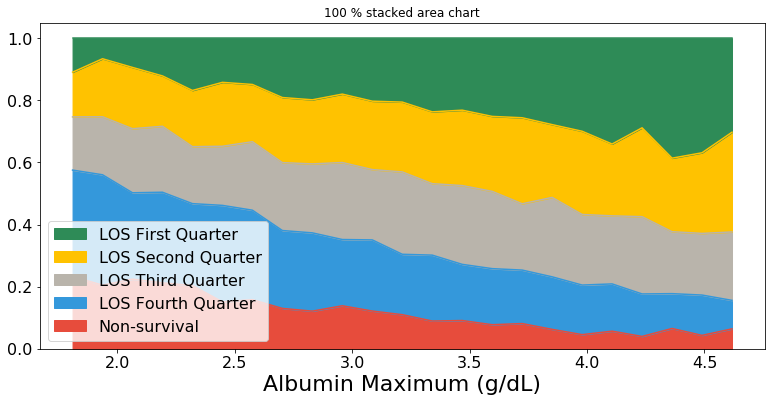

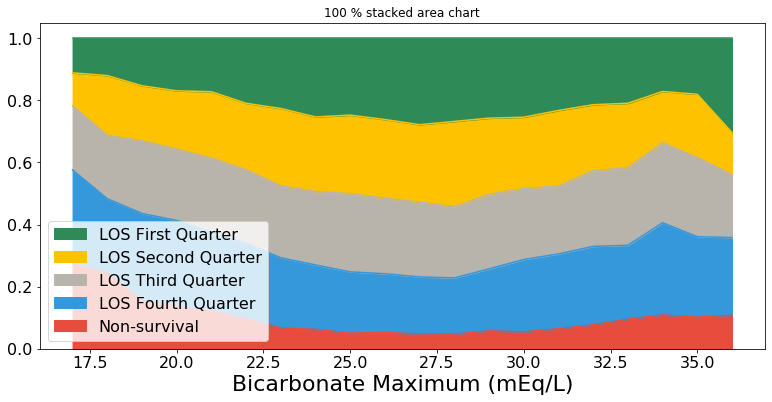

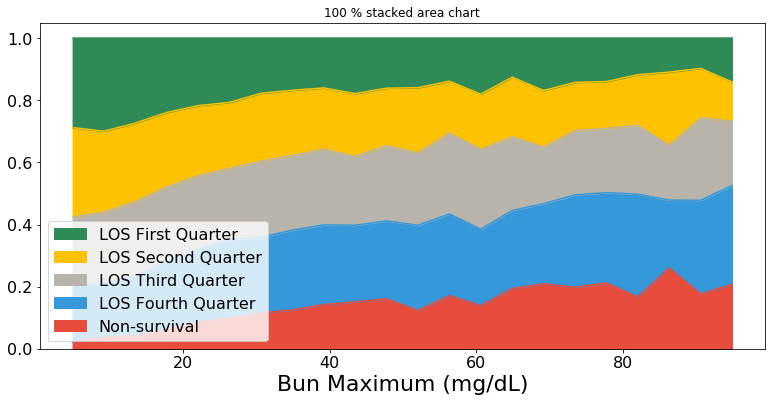

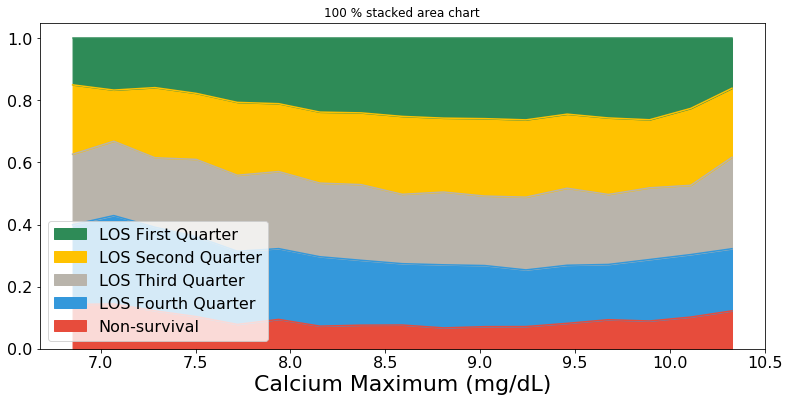

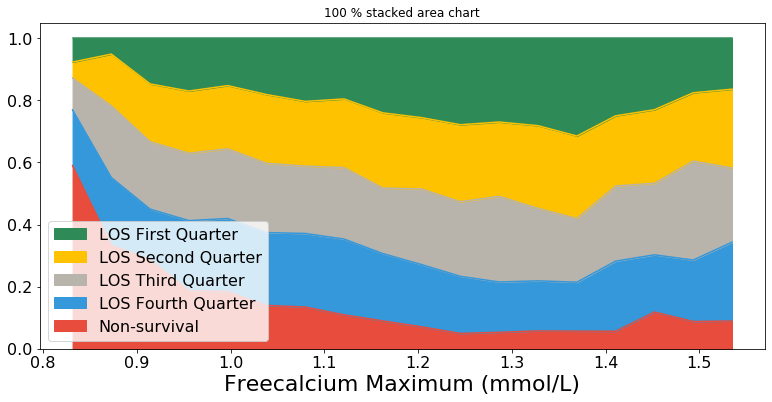

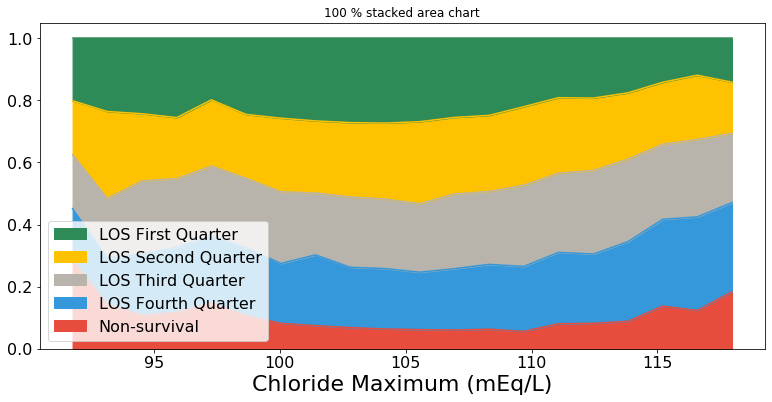

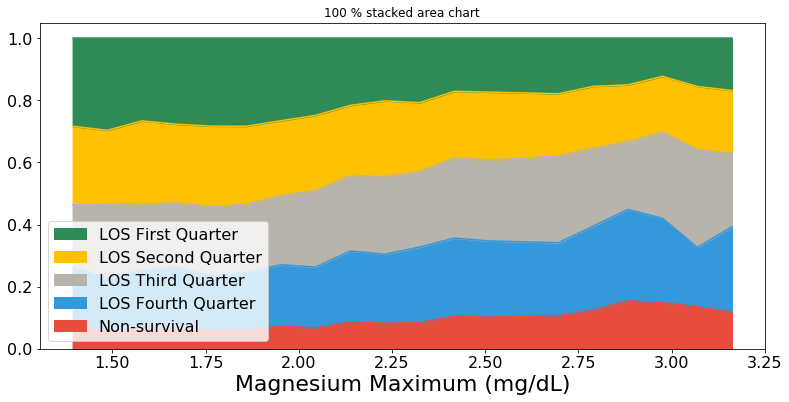

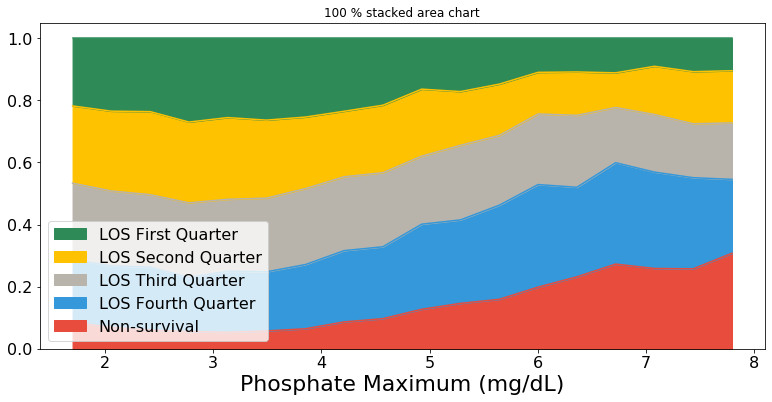

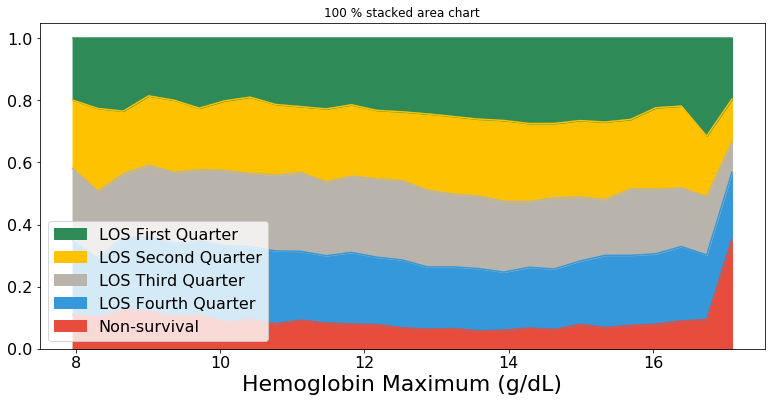

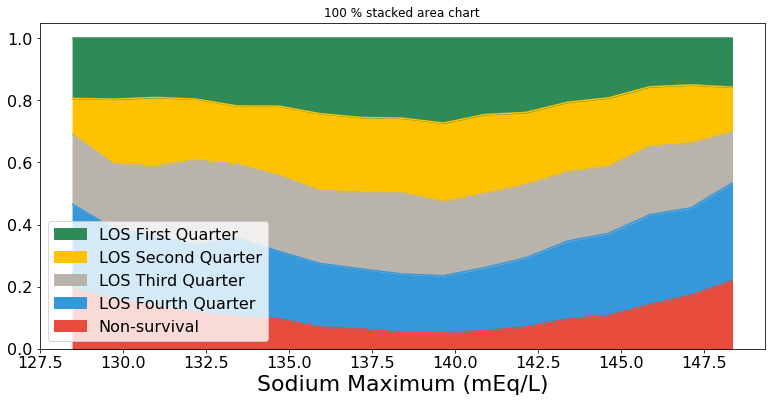

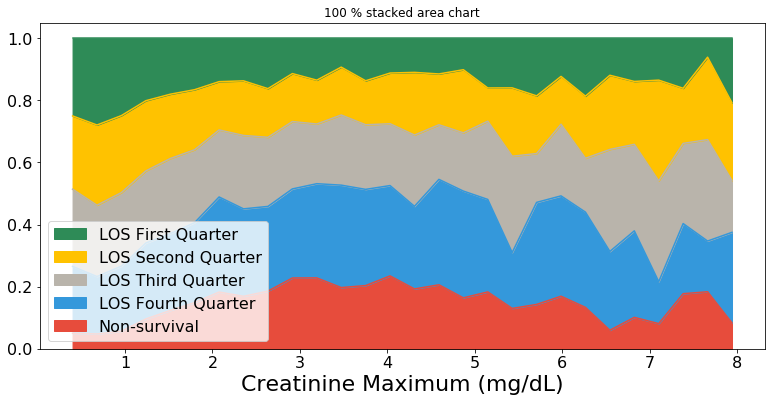

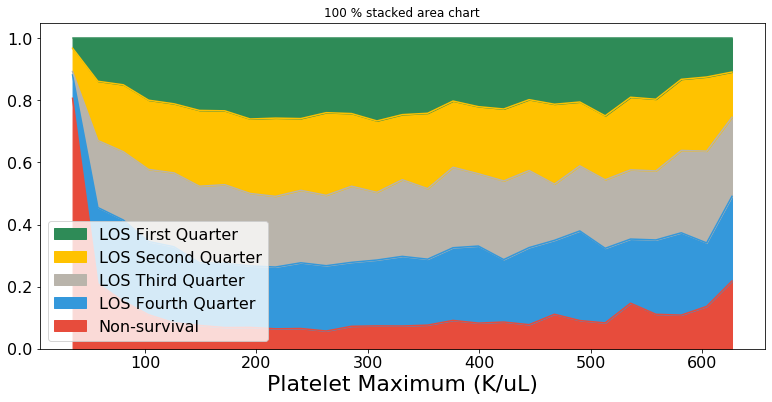

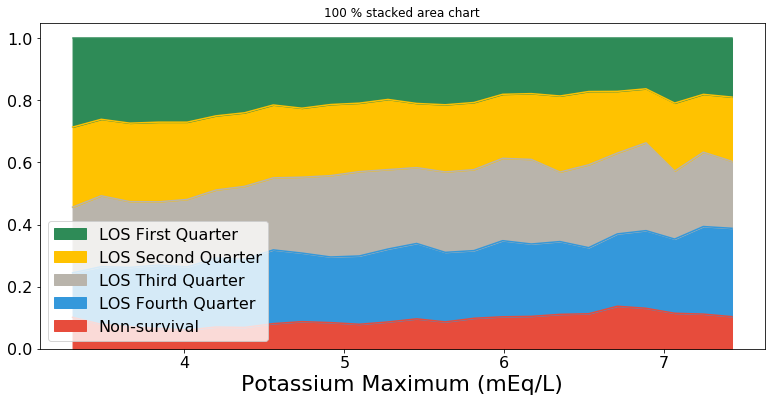

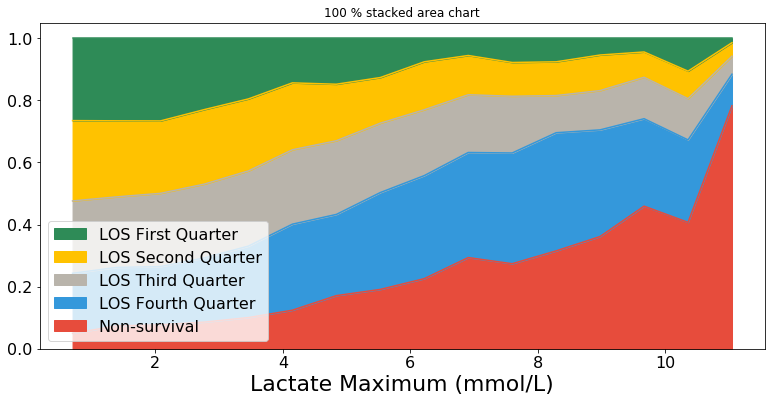

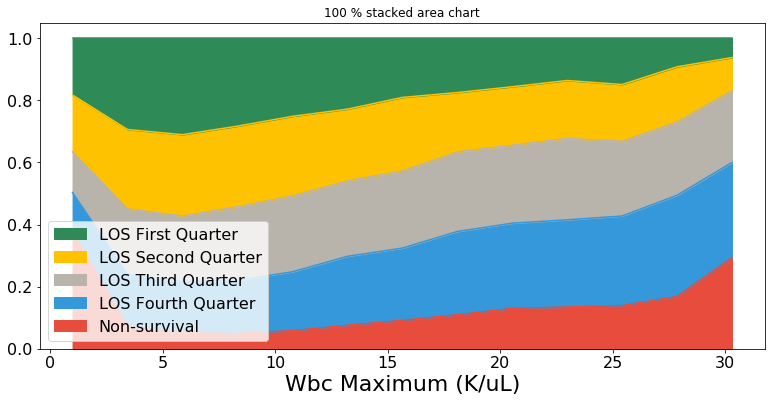

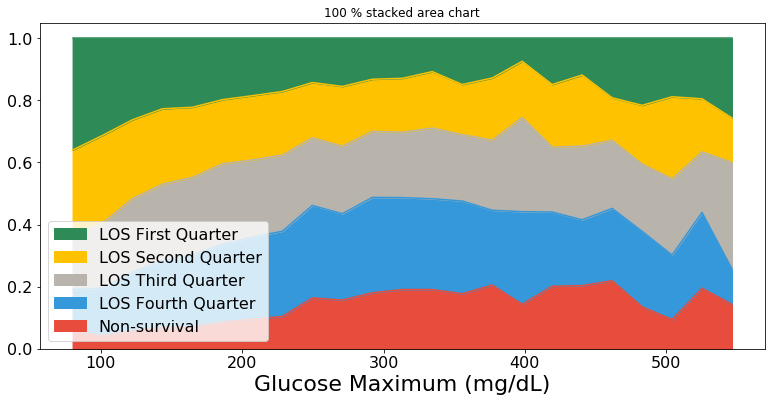

In [5]:
for i, u in iter(lab_unit.items()):

        # get x range for stacked plot 
        x_lower = data[i.lower()+'_max'].quantile(0.01).round(2)
        x_upper = data[i.lower()+'_max'].quantile(0.99).round(2)
        
        # get lab value of each quarter
        n_surv = surv_data[i.lower()+'_max'].dropna().count()
        quarter = n_surv//4

        non_surv_lower = mort_data[i.lower()+'_max'].quantile(0.01).round(2)
        non_surv_upper= mort_data[i.lower()+'_max'].quantile(0.99).round(2)

        #surv_lower = surv_data[i.lower()+'_max'].quantile(0.01).round(2)
        #surv_upper = surv_data[i.lower()+'_max'].quantile(0.99).round(2)

        surv_lower = data.sort_values(by=['los'])[i.lower()+'_max'][data.mort_icu==0].head(int(quarter)).quantile(0.01)
        surv_upper = data.sort_values(by=['los'])[i.lower()+'_max'][data.mort_icu==0].head(int(quarter)).quantile(0.99)

        '''
        non_survival = mort_data[i.lower()+'_max'][(data[i.lower()+'_max']>= x_lower) & (data[i.lower()+'_max']<= x_upper)].dropna()
        first_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][(data[i.lower()+'_max']>= x_lower) & (data[i.lower()+'_max']<= x_upper)].dropna().head(int(quarter))
        second_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][(data[i.lower()+'_max']>= x_lower) & (data[i.lower()+'_max']<= x_upper)].dropna()[int(quarter):int(quarter)*2]
        third_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][(data[i.lower()+'_max']>= x_lower) & (data[i.lower()+'_max']<= x_upper)].dropna()[int(quarter)*2:int(quarter)*3]
        fourth_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][(data[i.lower()+'_max']>= x_lower) & (data[i.lower()+'_max']<= x_upper)].dropna()[int(quarter)*3:]
        '''

        cond_surv = (data[i.lower()+'_max']>= surv_lower) & (data[i.lower()+'_max']<= surv_upper)

        non_survival = mort_data[i.lower()+'_max'][(data[i.lower()+'_max']>= non_surv_lower) & (data[i.lower()+'_max']<= non_surv_upper)].dropna()
        first_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][cond_surv].dropna().head(int(quarter))
        second_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][cond_surv].dropna()[int(quarter):int(quarter)*2]
        third_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][cond_surv].dropna()[int(quarter)*2:int(quarter)*3]
        fourth_quarter = surv_data.sort_values(by=['los'])[i.lower()+'_max'][cond_surv].dropna()[int(quarter)*3:]

        
        non_survival = pd.Series(non_survival.values, name = 'Non-survival').sort_values().reset_index(drop=True)
        first_quarter = pd.Series(first_quarter.values, name='First Quarter').sort_values().reset_index(drop=True)
        second_quarter = pd.Series(second_quarter.values, name='Second Quarter').sort_values().reset_index(drop=True)
        third_quarter = pd.Series(third_quarter.values, name='Third Quarter').sort_values().reset_index(drop=True)
        fourth_quarter = pd.Series(fourth_quarter.values, name='Fourth Quarter').sort_values().reset_index(drop=True)
        
        all_groups = pd.DataFrame({'Non-survival':non_survival,
                         'First Quarter':first_quarter,
                         'Second Quarter':second_quarter,
                         'Third Quarter':third_quarter,
                         'Fourth Quarter':fourth_quarter
                         })


        range2 = max(all_groups['Non-survival'].max(), all_groups['First Quarter'].max(), all_groups['Second Quarter'].max(), all_groups['Third Quarter'].max(), all_groups['Fourth Quarter'].max())
        range1 = min(all_groups['Non-survival'].min(), all_groups['First Quarter'].min(), all_groups['Second Quarter'].min(), all_groups['Third Quarter'].min(), all_groups['Fourth Quarter'].dropna().min())

        #upper first or lower first? Does it matter?

        #x_range_max = np.linspace(x_lower, x_upper, num=30)
        x_range_max = np.linspace(range1, range2, num=30)




        df_max = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
        df_max['range'] = x_range_max


        for index, row in df_max.iterrows():
            c_non = 0
            c_1st = 0
            c_2nd = 0
            c_3rd = 0
            c_4th = 0
            if (row['range'] != x_range_max[-1]):
                for k in non_survival:
                    if k >= row['range'] and k < df_max.iloc[index+1]['range']:
                        c_non += 1 
            if (row['range'] != x_range_max[-1]):
                for k in first_quarter:
                    if k >= row['range'] and k < df_max.iloc[index+1]['range']:
                        c_1st += 1 
            if (row['range'] != x_range_max[-1]):
                for k in second_quarter:
                    if k >= row['range'] and k < df_max.iloc[index+1]['range']:
                        c_2nd += 1 
            if (row['range'] != x_range_max[-1]):
                for k in third_quarter:
                    if k >= row['range'] and k < df_max.iloc[index+1]['range']:
                        c_3rd += 1 
            if (row['range'] != x_range_max[-1]):
                for k in fourth_quarter:
                    if k >= row['range'] and k < df_max.iloc[index+1]['range']:
                        c_4th += 1 
        
            df_max.iat[index, 0] = c_non
            df_max.iat[index, 4] = c_1st
            df_max.iat[index, 3] = c_2nd
            df_max.iat[index, 2] = c_3rd
            df_max.iat[index, 1] = c_4th
        
        df_max_ = df_max.set_index(['range'])

        df_max_cut0 = df_max_[(df_max_ != 0).all(1)]

        df_max_perc = df_max_cut0.divide(df_max_cut0.sum(axis=1), axis=0)
        color_list =["#e74c3c", "#3498db" ,"#b9b4ab", "#FFC200", "#2e8b57"]
        df_max_perc.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6), color = color_list)
        fig = plt.gcf()
        ax = plt.gca()
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[::-1], labels[::-1], fontsize=16, loc="lower left")
        plt.tick_params(axis='both', labelsize=16)
        plt.xlabel(i[0]+i[1:].lower()+' Maximum ('+u+')', fontsize=22)
        plt.savefig("mimic_figure/STACK/{}_MAX_STACK.png".format(i))
